<a href="https://colab.research.google.com/github/Anagha1602/Machine-Learning/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision import datasets

In [ ]:
transform = transforms.ToTensor()
traindata = datasets.MNIST(root='data',train=True,download=True,transform=transform)
testdata = datasets.MNIST(root='data',train=False,download=True,transform=transform)

In [ ]:
num_workers = 0
batch_size = 10
trainloader = torch.utils.data.DataLoader(traindata,batch_size=batch_size,num_workers=num_workers)
testloader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,num_workers=num_workers)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self, encoding_size):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Linear(28 * 28, encoding_size)
        self.decoder = nn.Linear(encoding_size, 28*28)

    def forward(self, x):
        x = F.relu(self.encoder(x))
        x = F.sigmoid(self.decoder(x))
        return x

encoding_size = 32
model = Autoencoder(encoding_size)
print(model)


Autoencoder(
  (encoder): Linear(in_features=784, out_features=32, bias=True)
  (decoder): Linear(in_features=32, out_features=784, bias=True)
)


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
n_epochs = 17
for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    for data in trainloader:
        images, _ = data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
    train_loss = train_loss / len(trainloader)
    print('Epoch: {} Training Loss: {:.6f}'.format(epoch, train_loss ))


Epoch: 1 Training Loss: 0.234411
Epoch: 2 Training Loss: 0.124084
Epoch: 3 Training Loss: 0.117564
Epoch: 4 Training Loss: 0.115371
Epoch: 5 Training Loss: 0.114205
Epoch: 6 Training Loss: 0.113395
Epoch: 7 Training Loss: 0.112801
Epoch: 8 Training Loss: 0.112327
Epoch: 9 Training Loss: 0.111940
Epoch: 10 Training Loss: 0.111618
Epoch: 11 Training Loss: 0.111341
Epoch: 12 Training Loss: 0.111099
Epoch: 13 Training Loss: 0.110870
Epoch: 14 Training Loss: 0.110658
Epoch: 15 Training Loss: 0.110466
Epoch: 16 Training Loss: 0.110288
Epoch: 17 Training Loss: 0.110122


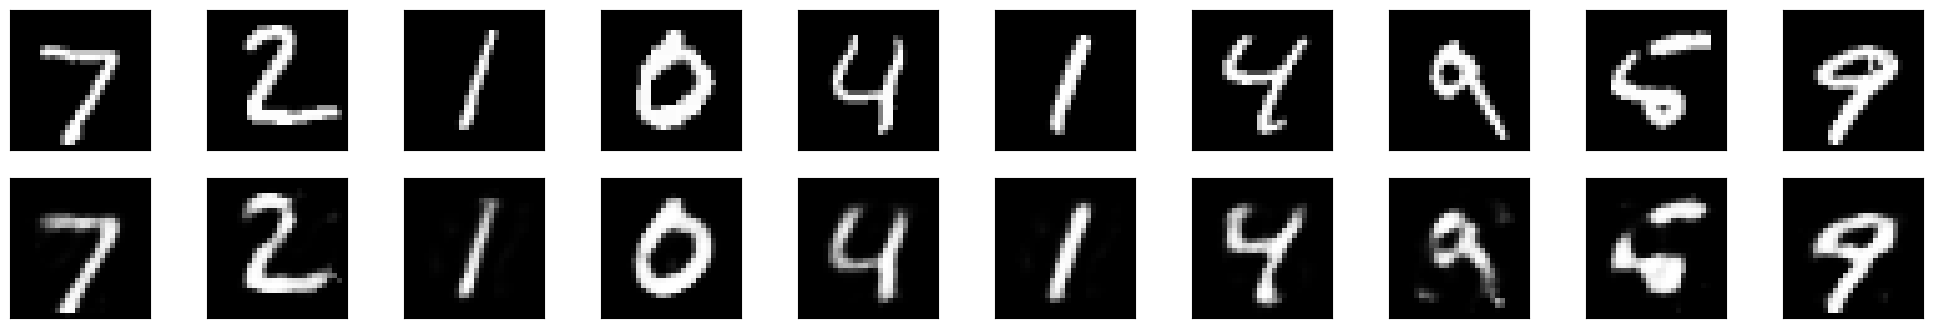

In [ ]:
import matplotlib.pyplot as plt

for images, labels in testloader:
    images_flatten = images.view(images.size(0), -1)
    output = model(images_flatten)
    images = images.numpy()
    output = output.view(images.shape[0], 1, 28, 28)
    output = output.detach().numpy()

    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25, 4))

    for i in range(10):
        original_img = np.squeeze(images[i])
        axes[0, i].imshow(original_img, cmap='gray')
        axes[0, i].get_xaxis().set_visible(False)
        axes[0, i].get_yaxis().set_visible(False)

    for i in range(10):
        reconstructed_img = np.squeeze(output[i])
        axes[1, i].imshow(reconstructed_img, cmap='gray')
        axes[1, i].get_xaxis().set_visible(False)
        axes[1, i].get_yaxis().set_visible(False)

    plt.show()
    break
